In [ ]:
!git clone https://github.com/aehrc/imageclefmedical_caption_23.git

Cloning into 'imageclefmedical_caption_23'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 51 (delta 13), reused 37 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 656.14 KiB | 5.09 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
!python -m venv --system-site-packages venv
!source venv/bin/activate
!python -m pip install --upgrade pip
!python -m pip install --upgrade -r requirements.txt --no-cache-dir

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/imageclefmedical_caption_23/venv/bin/python3

/bin/bash: line 1: venv/bin/activate: No such file or directory


In [ ]:
!ls

config	docs  example.ipynb  LICENSE  modules  README.md  requirements.txt  tools


In [ ]:
!ls

config	docs  example.ipynb  LICENSE  modules  README.md  requirements.txt  tools  venv


In [ ]:
!dlhpcstarter -t imageclefmed_caption_2023_hf -c config/test_huggingface/007_no_ca_scst.yaml --stages_module tools.stages --test

args: {'task': 'imageclefmed_caption_2023_hf', 'config': 'config/test_huggingface/007_no_ca_scst', 'exp_dir': '/datasets/work/hb-mlaifsp-mm/work/experiments', 'work_dir': '/content/imageclefmedical_caption_23', 'dataset_dir': '/datasets/work/hb-mlaifsp-mm/work/datasets', 'ckpt_zoo_dir': '/datasets/work/hb-mlaifsp-mm/work/checkpoints', 'definition': 'SCSTNoCrossAttentionBERTScore', 'module': 'modules.lightning_modules.no_ca_scst', 'stages_definition': 'stages', 'stages_module': 'tools.stages', 'train': None, 'trial': 0, 'resume_last': True, 'resume_epoch': None, 'resume_ckpt_path': None, 'warm_start_ckpt_path': None, 'monitor': 'val_bertscore_f1', 'monitor_mode': 'max', 'test': True, 'test_epoch': None, 'test_ckpt_path': None, 'fast_dev_run': None, 'num_workers': 7, 'devices': 1, 'num_nodes': 1, 'memory': '64GB', 'time_limit': None, 'submit': None, 'qos': None, 'begin': None, 'slurm_cmd_path': None, 'email': None, 'cuda_visible_devices': None, 'venv_path': None, 'config_file_name': 'con

In [ ]:
from google.colab import files
files.upload()

Saving brain.jpg to brain.jpg


{'brain.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x02\x00\x1c\x00\x1c\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xc0\x00\x0b\x08\x03\xe7\x04\xac\x01\x01\x11\x00\xff\xc4\x00\x1d\x00\x00\x01\x05\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\xff\xc4\x00N\x10\x00\x01\x04\x01\x02\x03\x06\x01\x08\x07\x06\x05\x02\x06\x00\x07\x01\x00\x02\x03\x11\x04\x05!\x06\x121\x07\x13"AQaq\x08\x142\x81\xb1\xc1\xd1\xf0\x15#Bb\x91\xa1\xe1Rr\xb2\xc2\xd2\xf1$3\x82\x92\xa2\x16C4Scs\x83\xe2\x17%5d\x93\xb3\xf2\xff\xda\x00\x08\x01\x01\x00\x00?\x00\xf8\xc9\x08B\x10\x84!\x08B\x10\x84!\x08J:\xa7\xd2R\xd1I\xccul\x9a\xfd\xdd\xb2ph!F\xf6\xee\x98\x9d\xca\x8a\t\xc0l\x9bVPv@\xdd+\x86\xc9\x01(CJ:\xa5\r\x08v\xc9\xa6\xcap\xa0\x82\xebCM\x94\x10:\xa1!@\xdd/D

In [ ]:
import os, torch, transformers
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from io import BytesIO
from torchvision.utils import make_grid

ckpt_name = 'aehrc/medicap'

dataset_dir = '/datasets/work/hb-mlaifsp-mm/work/datasets'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder_decoder = transformers.AutoModel.from_pretrained(ckpt_name, trust_remote_code=True).to(device)
encoder_decoder.eval()
image_processor = transformers.AutoFeatureExtractor.from_pretrained(ckpt_name)

test_transforms = transforms.Compose(
    [
        transforms.Resize(size=image_processor.size['shortest_edge']),
        transforms.CenterCrop(size=[
            image_processor.size['shortest_edge'],
            image_processor.size['shortest_edge'],
        ]
        ),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=image_processor.image_mean,
            std=image_processor.image_std,
        ),
    ]
)

tokenizer = transformers.PreTrainedTokenizerFast.from_pretrained(ckpt_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when poss

In [ ]:
images = [
    'brain.jpg'
]

for i, _ in enumerate(images):
    images[i] = Image.open(images[i])
    images[i] = images[i].convert('RGB')
    images[i] = test_transforms(images[i])

images = torch.stack(images, dim=0)
images.shape

torch.Size([1, 3, 384, 384])

In [ ]:
outputs = encoder_decoder.generate(
    pixel_values=images.to(device),
    bos_token_id=tokenizer.bos_token_id,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.pad_token_id,
    return_dict_in_generate=True,
    use_cache=True,
    max_length=256,
    num_beams=4,
)
outputs.sequences

tensor([[50257, 31554,   498,   309,    16,    12,  6551,   276, 30278,  9367,
           286,   262,  3632,  4478,   257,  2347,   287,   262,  1364, 30424,
         49918,    13, 50256]])

In [ ]:
[tokenizer.decode(i, skip_special_tokens=True) for i in outputs.sequences]


['Axial T1-weighted MRI scan of the brain showing a mass in the left frontal lobe.']

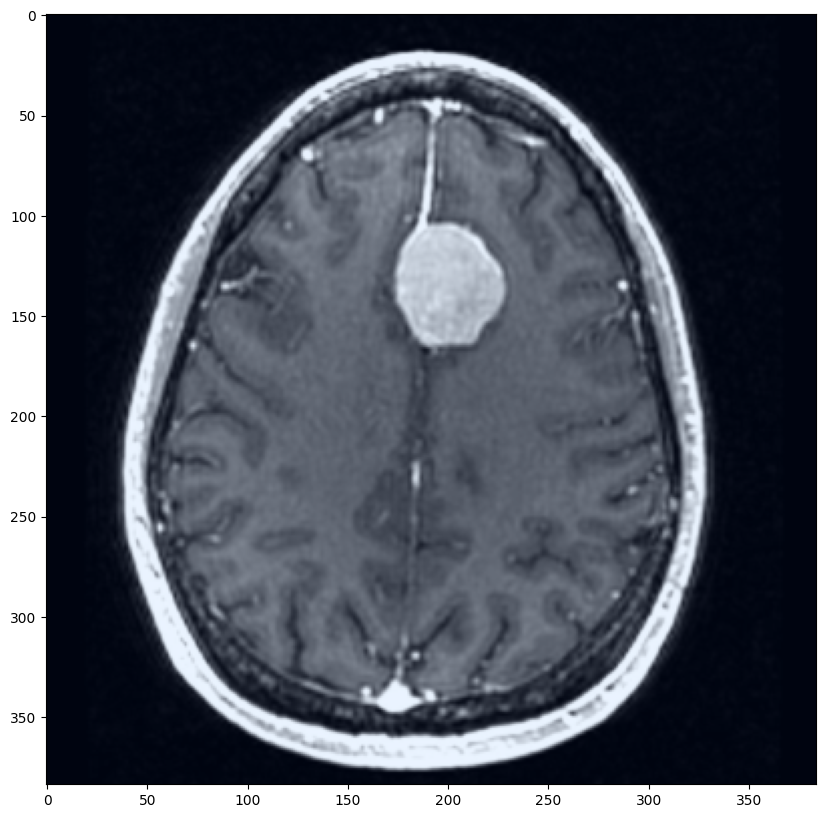

In [ ]:
plt.figure(figsize = (20,10))
plt.imshow(make_grid(images, normalize=True).permute(1, 2, 0))
